In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [232]:
df_stations = pd.read_csv('data/stations.csv')
boston_id = 139
df_boston = df_stations[df_stations['city_id'] == boston_id]
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 9591 to 14579
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          374 non-null    int64  
 1   name        372 non-null    object 
 2   geometry    374 non-null    object 
 3   buildstart  374 non-null    float64
 4   opening     374 non-null    float64
 5   closure     374 non-null    float64
 6   city_id     374 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 23.4+ KB


In [233]:
df_boston['closure'] = np.where(df_boston['closure'] > 3000.0,
                                      np.nan, df_boston['closure'])
df_boston['buildstart'] = np.where(df_boston['buildstart'] == 0,
                                      np.nan, df_boston['buildstart'])
df_boston['opening'] = np.where(df_boston['opening'] == 0,
                                      np.nan, df_boston['opening'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [305]:
def over_time(df, column_to_plot, column_count):
    group_obj = df.groupby([column_to_plot])[column_count].count()
    group_df = group_obj.reset_index()
    ticks = [1,25,50,75]
    labs = [group_df[column_to_plot][tick] for tick in ticks]
    ax = group_obj.plot.bar()
    ax.set_title('Stations Opened')
    ax.set_xticks(ticks)
    ax.set_xticklabels(labs)
    ax.set_ylabel('Stations')
    ax.set_xlabel('Year')
    
def tracks_over_time(df, column_to_plot, column_count):
    group_obj = df.groupby([column_to_plot])[column_count].count()
    group_df = group_obj.reset_index()
    ticks = [1,25,50]
    labs = [group_df[column_to_plot][tick] for tick in ticks]
    ax = group_obj.plot.bar()
    ax.set_title('Tracks Opened')
    ax.set_xticks(ticks)
    ax.set_xticklabels(labs)
    ax.set_ylabel('Stations')
    
def close_over_time(df, column_to_plot, column_count):
    group_obj = df.groupby([column_to_plot])[column_count].count()
    group_df = group_obj.reset_index()
    ticks = [1,10,20]
    labs = [group_df[column_to_plot][tick] for tick in ticks]
    ax = group_obj.plot.bar()
    ax.set_title('Closures')
    ax.set_xticks(ticks)
    ax.set_xticklabels(labs)
    ax.set_ylabel('Tracks')

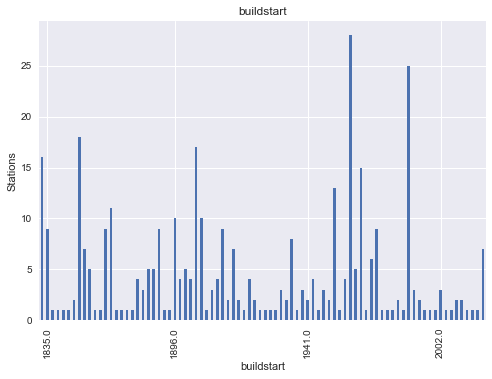

In [299]:
over_time(df_boston, 'buildstart', 'id')

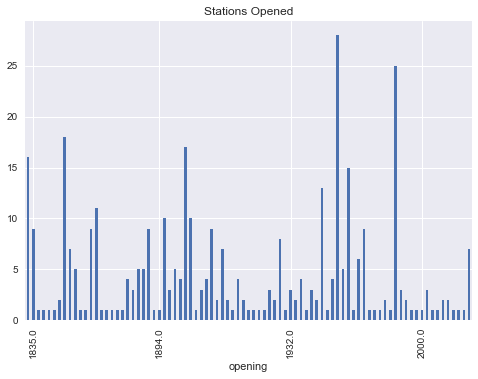

In [306]:
over_time(df_boston, 'opening', 'id')

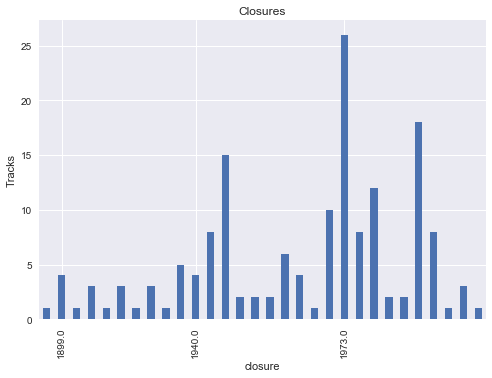

In [307]:
close_over_time(df_boston, 'closure', 'id')

In [282]:
df_tracks = pd.read_csv('data/tracks.csv')
df_boston_tracks = df_tracks[df_tracks['city_id'] == boston_id]
df_boston_tracks.head()

,id,geometry,buildstart,opening,closure,length,city_id
131,8971,"LINESTRING(-71.1055106 42.3464858,-71.10523556...",1888.0,1888.0,1932.0,757,139
1981,8973,"LINESTRING(-71.0645245542104 42.3526597738119,...",1895.0,1897.0,999999.0,451,139
1986,8974,"LINESTRING(-71.0896405453459 42.3508100910057,...",1889.0,1889.0,1914.0,330,139
4653,8979,"LINESTRING(-71.0622649133985 42.3563093900915,...",1898.0,1898.0,999999.0,409,139
4704,8982,"LINESTRING(-71.0595494162015 42.3593691538885,...",1898.0,1898.0,1963.0,553,139


In [310]:
df_boston_tracks['closure'] = np.where(df_boston_tracks['closure'] > 3000.0,
                                      np.nan, df_boston_tracks['closure'])
df_boston_tracks['buildstart'] = np.where(df_boston_tracks['buildstart'] == 0,
                                      np.nan, df_boston_tracks['buildstart'])
df_boston_tracks['opening'] = np.where(df_boston_tracks['opening'] == 0,
                                      np.nan, df_boston_tracks['opening'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

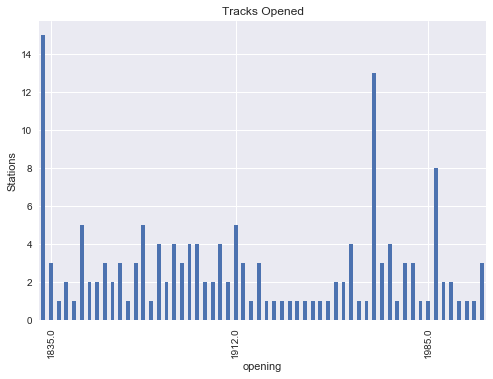

In [311]:
tracks_over_time(df_boston_tracks, 'opening', 'id')

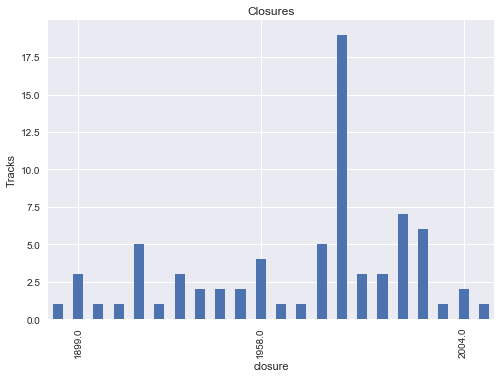

In [312]:
close_over_time(df_boston_tracks, 'closure', 'id')